참고 : https://western-sky.tistory.com/15

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 400)

csv 파일 읽기

데이터셋 출처 <br>
DVM Car Dataset : https://deepvisualmarketing.github.io/

In [2]:
data = pd.read_csv(r'Edited_Trim_table.csv')
used_car = data.copy()

모델을 작성하기전에 데이터 형태를 확인

* Genmodel_ID : Genmodel의 ID
* Maker : 차의 브랜드, 메이커
* Genmodel : 차의 모델명
* Trim : 옵션을 포함한 차의 모델명
* Year : 판매된 연도
* Price : 그 연도에 판매된 가격
* Gas_emission : 가스 배출
* Fuel_type : 연료의 타입
* Engine_size : 엔진 사이즈
* Entry_price : 제일 싼 판매 가격

In [3]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335562 entries, 0 to 335561
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Genmodel_ID   335562 non-null  object 
 1   Maker         335562 non-null  object 
 2   Genmodel      335562 non-null  object 
 3   Trim          335562 non-null  object 
 4   Year          335562 non-null  int64  
 5   Price         335562 non-null  int64  
 6   Gas_emission  335562 non-null  int64  
 7   Fuel_type     335562 non-null  object 
 8   Engine_size   335562 non-null  int64  
 9   Entry_price   335562 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 25.6+ MB


null은 없지만 <br>
year은 숫자보다는 str 형태로 <br>
Entry_price는 int 형태로 바꾸는 편이 나아보인다

In [5]:
used_car['Year'] = used_car['Year'].astype(str)

In [6]:
used_car['Entry_price'] = used_car['Entry_price'].astype(int)

In [7]:
# 바꾼 뒤의 데이터 타입 확인
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335562 entries, 0 to 335561
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Genmodel_ID   335562 non-null  object
 1   Maker         335562 non-null  object
 2   Genmodel      335562 non-null  object
 3   Trim          335562 non-null  object
 4   Year          335562 non-null  object
 5   Price         335562 non-null  int64 
 6   Gas_emission  335562 non-null  int64 
 7   Fuel_type     335562 non-null  object
 8   Engine_size   335562 non-null  int64 
 9   Entry_price   335562 non-null  int32 
dtypes: int32(1), int64(3), object(6)
memory usage: 24.3+ MB


잘 바뀌었으니 다음으로 각 변수들의 상관관계를 파악한다

In [8]:
used_car.corr()

,Price,Gas_emission,Engine_size,Entry_price
Price,1.000000,0.402581,0.735678,0.952523
Gas_emission,0.402581,1.000000,0.706309,0.385485
Engine_size,0.735678,0.706309,1.000000,0.664360
Entry_price,0.952523,0.385485,0.664360,1.000000


<AxesSubplot:>

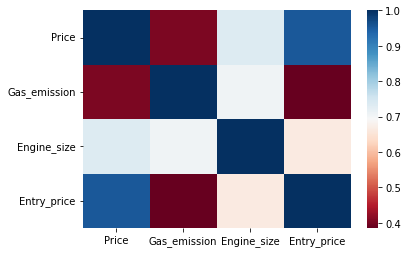

In [9]:
corr = used_car.corr()
sns.heatmap(corr, cmap='RdBu')

Price와 Entry_price 간의 아주 높은 상관관계가 보인다

# 타겟값 price와 brand의 이상치를 확인한다.
# 제 컴퓨터에서 렉이 너무 심하게 걸려서
# 이 셀은 잠시 마크다운으로 바꿨습니다
fig = px.scatter(used_car, x='Entry_price', y='Price')
fig.show()

확인해보니 꽤나 깔끔한 비례 관계가 보인다 <br>
따라서 모델은 선형모델을 선정했다

In [10]:
# 타겟 데이터
y_target = used_car['Price']
# 피처 데이터
X_features = used_car['Entry_price']

# test_split_split()으로 train,test set 분리
# X_train, y_train은 학습용 데이터 셋, X_test는 예측용, y_test는 예측한 것과 비교할 평가용
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=77)

In [11]:
# LinearRegression() 모델로 학습
linear_reg = LinearRegression()
linear_reg.fit(X_train.values.reshape(-1,1), y_train)
# LinearRegression() 모델로 예측
y_preds = linear_reg.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print('MSE : {0:.3f}, RMSE : {1:.4f}'.format(mse, rmse))
print('R_Square : {0:.3f}'.format(r_square))

MSE : 25812749.262, RMSE : 5080.6249
R_Square : 0.907


In [15]:
linear_reg.predict([[13945]])[0]

19521.78382243432

In [4]:
# 모델을 파이토치 save 형태로 저장
# 이상하게 제 컴퓨터에서 주피터로 파이토치를 깔려고하면 설치가 안되네요..
import torch

ERROR: unknown command "pytorch"



In [39]:
# 모델 save
torch.save(linear_reg, 'linear.pt')

나중에 해야할 것 : 이상치 찾아서 제거하기, 다른 값들도 선형 회귀에 넣을 수는 없을까 고민해보기